### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [629]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [630]:
data = pd.read_csv('data/coupons.csv')

In [631]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


### Investigate the dataset for missing or problematic data.

In [632]:
# Calculate the % of data that is missing for each column
data_percent_present = (data.isnull().sum() / data.shape[0] * 100)
data_percent_present

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [633]:
for column in ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(column + ' Percentage of Values')
    print(data[column].value_counts(dropna=False, normalize=True))
    print('\n')


car Percentage of Values
NaN                                         0.991485
Scooter and motorcycle                      0.001734
Mazda5                                      0.001734
do not drive                                0.001734
crossover                                   0.001656
Car that is too old to install Onstar :D    0.001656
Name: car, dtype: float64


Bar Percentage of Values
never    0.409729
less1    0.274519
1~3      0.194970
4~8      0.084831
gt8      0.027515
NaN      0.008436
Name: Bar, dtype: float64


CoffeeHouse Percentage of Values
less1    0.266872
1~3      0.254257
never    0.233523
4~8      0.140650
gt8      0.087591
NaN      0.017108
Name: CoffeeHouse, dtype: float64


CarryAway Percentage of Values
1~3      0.368338
4~8      0.335699
less1    0.146326
gt8      0.125670
never    0.012062
NaN      0.011905
Name: CarryAway, dtype: float64


RestaurantLessThan20 Percentage of Values
1~3      0.423841
4~8      0.282245
less1    0.165011
gt8      0.101309
neve

99.14% of the data is missing a value for 'car'. Since most of this data is missing, I will drop the 'car' column.

In [634]:
data_cleaned = data.drop(columns=['car'])

In [635]:
unique_rows_with_na = data_cleaned[data_cleaned.isna().any(axis=1)].shape[0]
print(unique_rows_with_na, unique_rows_with_na / data_cleaned.shape[0] * 100)

605 4.769788710186061


Of the remaining 605 rows (4.77%) that contain missing data, they all belong to columns that share the same values. I will replace these values with 'n/a' indicating the value is not available for these rows.

In [636]:
data_cleaned.fillna('n/a', inplace=True)

In [637]:
data_cleaned.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [638]:
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(column + ' Percentage of Values')
    print(data_cleaned[column].value_counts(dropna=False, normalize=True))
    print('\n')

Bar Percentage of Values
never    0.409729
less1    0.274519
1~3      0.194970
4~8      0.084831
gt8      0.027515
n/a      0.008436
Name: Bar, dtype: float64


CoffeeHouse Percentage of Values
less1    0.266872
1~3      0.254257
never    0.233523
4~8      0.140650
gt8      0.087591
n/a      0.017108
Name: CoffeeHouse, dtype: float64


CarryAway Percentage of Values
1~3      0.368338
4~8      0.335699
less1    0.146326
gt8      0.125670
never    0.012062
n/a      0.011905
Name: CarryAway, dtype: float64


RestaurantLessThan20 Percentage of Values
1~3      0.423841
4~8      0.282245
less1    0.165011
gt8      0.101309
never    0.017345
n/a      0.010249
Name: RestaurantLessThan20, dtype: float64


Restaurant20To50 Percentage of Values
less1    0.479108
1~3      0.259382
never    0.168401
4~8      0.057395
gt8      0.020814
n/a      0.014901
Name: Restaurant20To50, dtype: float64




In [639]:
data_cleaned.duplicated().sum()

74

There looks to be 74 duplicated rows. This is ok considering our dataset. It is possible for observers to have the same conditions, therefore this is to be expected and tollerated. No action needed

### Rename Columns and Values
I will change the column name 'Y' to 'Accepted' and the values 1 to True and 0 to False for easier readability

In [640]:
data_cleaned.rename(columns={'Y': "Accepted"}, inplace=True)
data_cleaned['Accepted'].replace([1,0], [True, False], inplace=True)
data_cleaned['has_children'].replace([1,0], [True, False], inplace=True)
data_cleaned[['Accepted', 'has_children']].sample(5)

,Accepted,has_children
12658,True,True
6391,True,False
427,True,False
10230,True,False
10510,True,True


### Validate Output

In [641]:
print(data_cleaned.shape)

for column in data_cleaned.columns:
    print(column + ' Percentage of Values')
    print(data_cleaned[column].value_counts(dropna=False, normalize=True))
    print('\n')

data_cleaned.sample(5)
# data_cleaned.info()

(12684, 25)
destination Percentage of Values
No Urgent Place    0.495348
Home               0.255203
Work               0.249448
Name: destination, dtype: float64


passanger Percentage of Values
Alone        0.575922
Friend(s)    0.260013
Partner      0.084752
Kid(s)       0.079313
Name: passanger, dtype: float64


weather Percentage of Values
Sunny    0.793835
Snowy    0.110769
Rainy    0.095396
Name: weather, dtype: float64


temperature Percentage of Values
80    0.514664
55    0.302744
30    0.182592
Name: temperature, dtype: float64


time Percentage of Values
6PM     0.254652
7AM     0.249448
10AM    0.179360
2PM     0.158389
10PM    0.158152
Name: time, dtype: float64


coupon Percentage of Values
Coffee House             0.315043
Restaurant(<20)          0.219647
Carry out & Take away    0.188663
Bar                      0.159019
Restaurant(20-50)        0.117629
Name: coupon, dtype: float64


expiration Percentage of Values
1d    0.559051
2h    0.440949
Name: expiration, dtyp

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
9583,No Urgent Place,Kid(s),Sunny,80,2PM,Coffee House,1d,Female,31,Unmarried partner,...,1~3,4~8,1~3,1~3,1,0,0,0,1,False
11234,No Urgent Place,Kid(s),Sunny,30,10PM,Restaurant(20-50),2h,Female,36,Married partner,...,less1,less1,less1,less1,1,0,0,0,1,False
2790,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Female,26,Single,...,less1,4~8,less1,4~8,1,0,0,0,1,True
481,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,less1,never,1,0,0,0,1,True
10417,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,26,Unmarried partner,...,never,1~3,less1,never,1,1,0,0,1,False


4. What proportion of the total observations chose to accept the coupon? 



### From the data below, 56.84% of observations accepted the coupon.

In [642]:
data_cleaned['Accepted'].value_counts(normalize=True)

True     0.568433
False    0.431567
Name: Accepted, dtype: float64

Text(0, 0.5, 'Count')

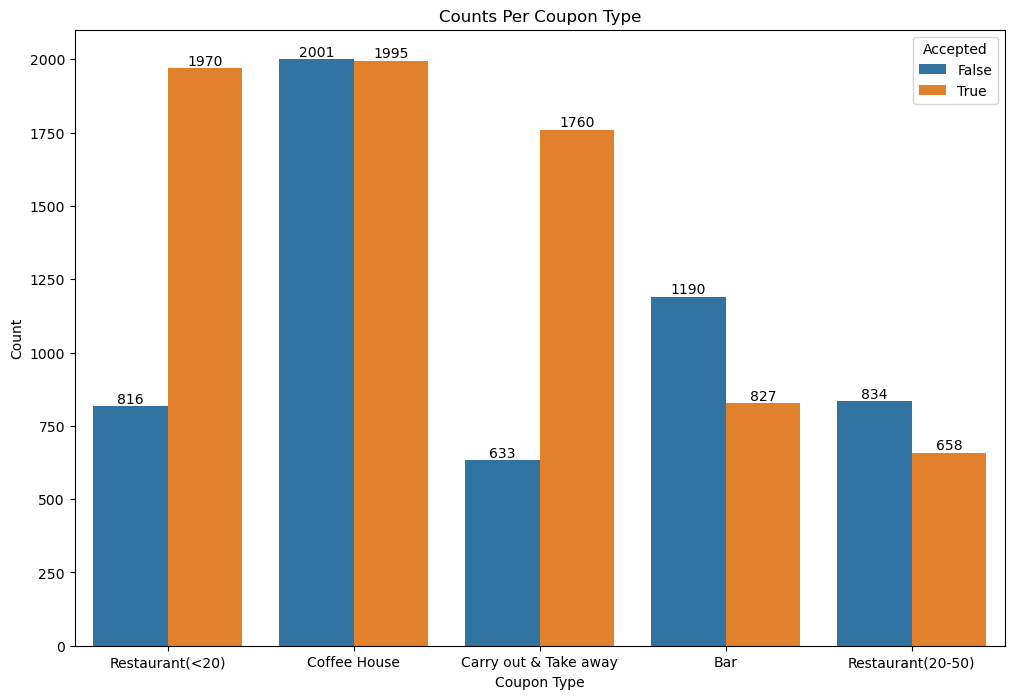

In [643]:
plt.figure(figsize=(12,8))

fig = sns.countplot(data_cleaned, x='coupon', hue='Accepted')
fig.bar_label(container=fig.containers[0])
fig.bar_label(container=fig.containers[1])

plt.title('Counts Per Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

### Initial Data Exploration

<Axes: xlabel='count', ylabel='occupation'>

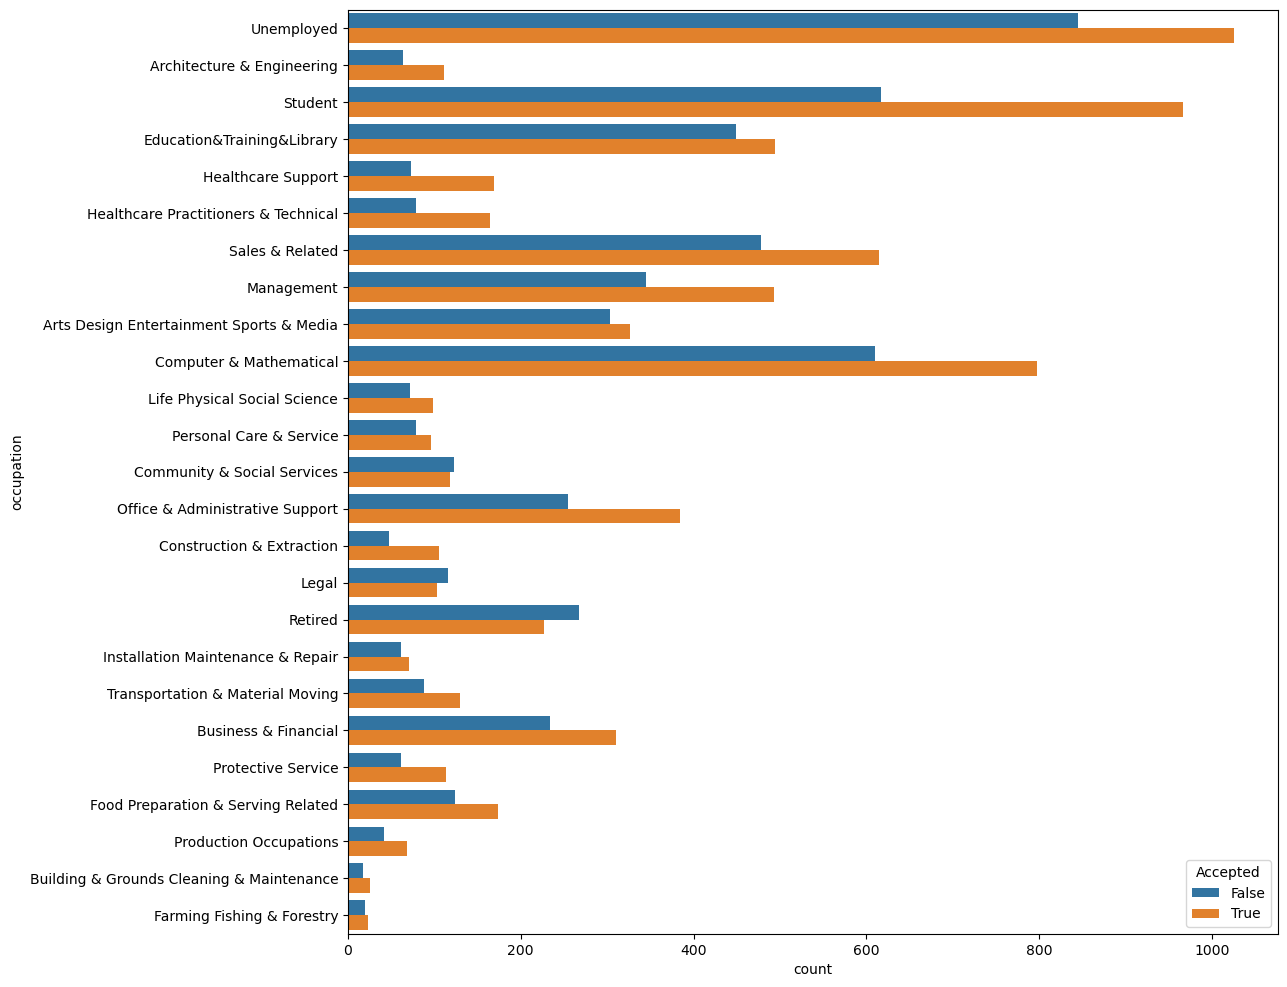

In [644]:
plt.figure(figsize=(12,12))
sns.countplot(data_cleaned, y='occupation', hue='Accepted')

# plt.title('Counts Per Coupon Type')
# plt.xlabel('Coupon Type')
# plt.ylabel('Count')

<Axes: xlabel='count', ylabel='income'>

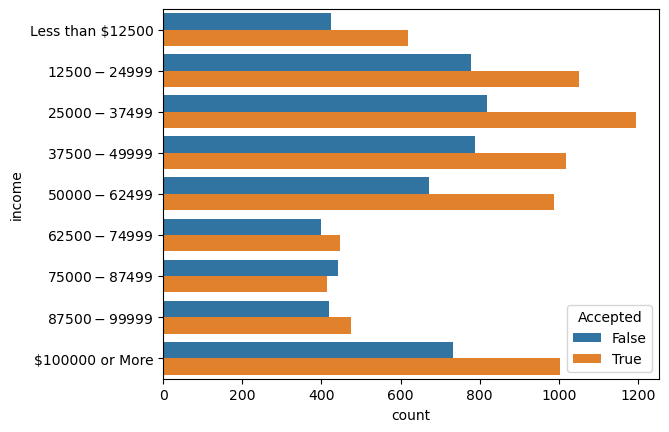

In [645]:
sns.countplot(data_cleaned, y='income', hue='Accepted', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])


<Axes: xlabel='age', ylabel='count'>

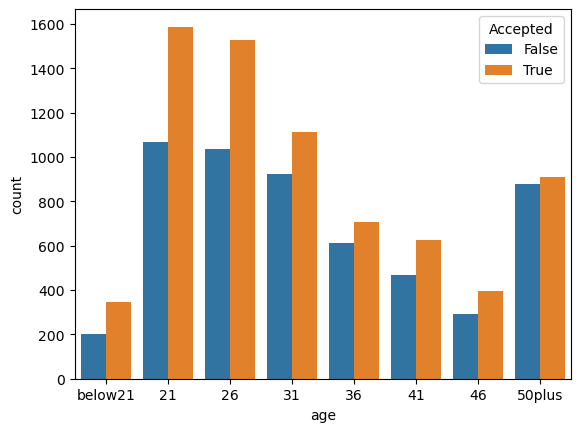

In [646]:
sns.countplot(data_cleaned, x='age', hue='Accepted', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])

<Axes: xlabel='weather', ylabel='count'>

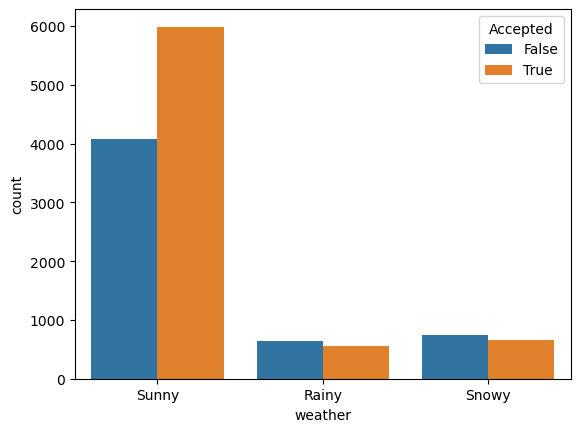

In [647]:
sns.countplot(data_cleaned, x='weather', hue='Accepted')

<Axes: xlabel='count', ylabel='maritalStatus'>

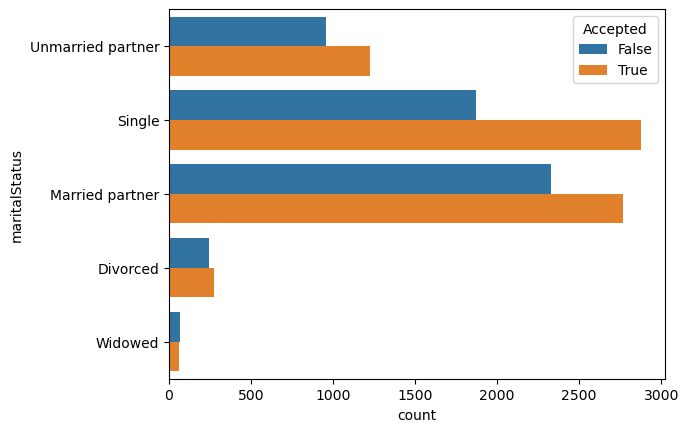

In [648]:
sns.countplot(data_cleaned, y='maritalStatus', hue='Accepted')

<Axes: xlabel='destination', ylabel='count'>

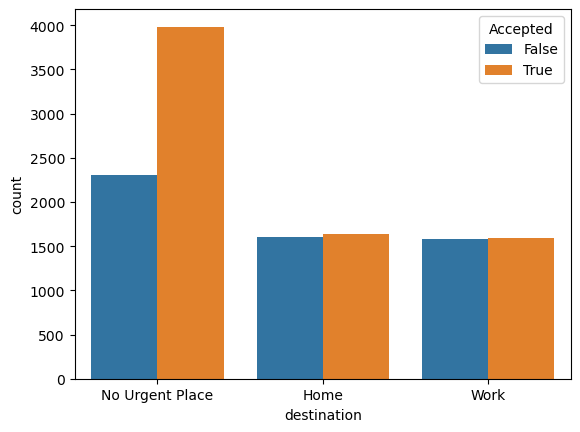

In [649]:
sns.countplot(data_cleaned, x='destination', hue='Accepted')

<Axes: xlabel='time', ylabel='count'>

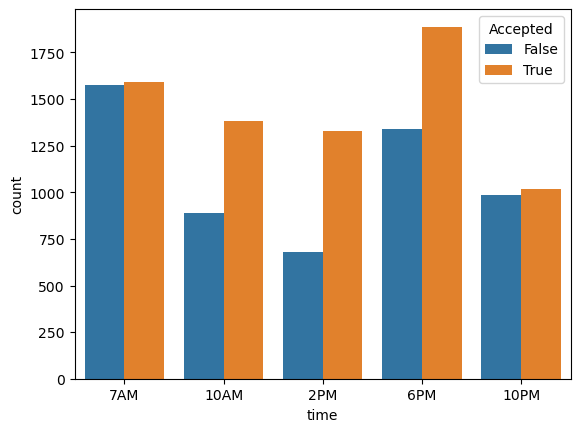

In [650]:
sns.countplot(data_cleaned, x='time', hue='Accepted', order=['7AM', '10AM', '2PM', '6PM', '10PM'])

<Axes: xlabel='temperature', ylabel='count'>

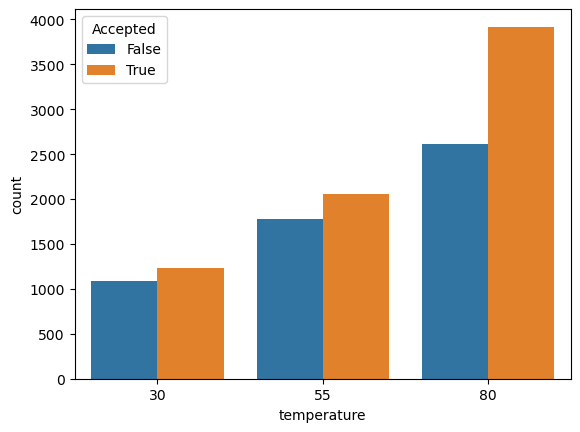

In [651]:
sns.countplot(data_cleaned, x='temperature', hue='Accepted')

<Axes: xlabel='expiration', ylabel='count'>

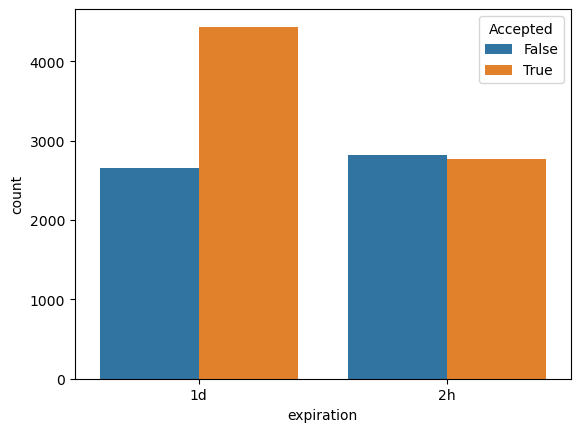

In [652]:
sns.countplot(data_cleaned, x='expiration', hue='Accepted')

<Axes: xlabel='count', ylabel='education'>

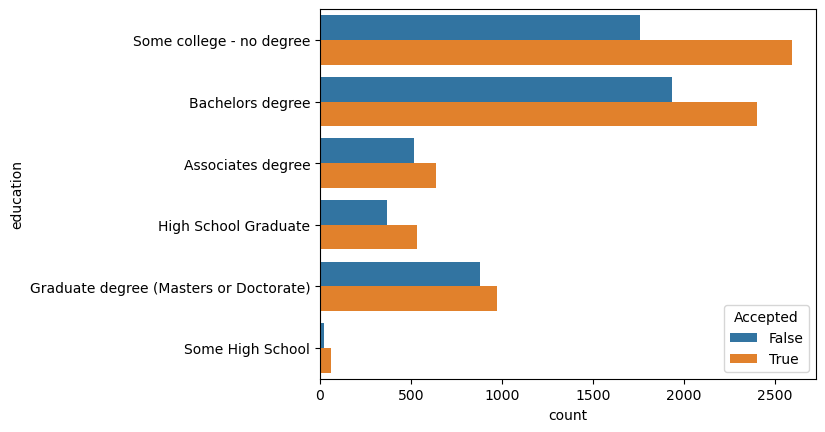

In [653]:
sns.countplot(data_cleaned, y='education', hue='Accepted')

<Axes: xlabel='passanger', ylabel='count'>

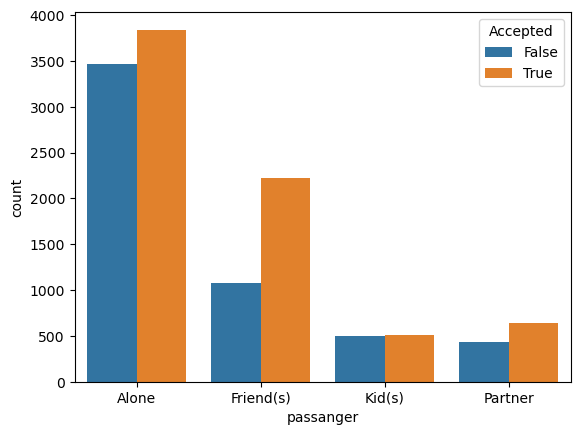

In [654]:
sns.countplot(data_cleaned, x='passanger', hue='Accepted')

<Axes: xlabel='has_children', ylabel='count'>

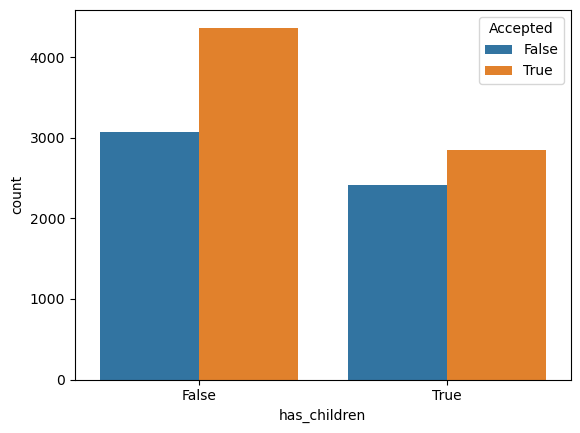

In [655]:
sns.countplot(data_cleaned, x='has_children', hue='Accepted')

## Investigating the Bar Coupons


In [656]:
df_bar = data_cleaned.query('coupon == "Bar"')
print(df_bar.shape)
df_bar.sample(5)

(2017, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
10052,Work,Alone,Rainy,55,7AM,Bar,1d,Male,26,Married partner,...,gt8,4~8,gt8,1~3,1,1,1,0,1,False
10727,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,21,Married partner,...,less1,1~3,1~3,never,1,0,0,0,1,False
2371,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Single,...,less1,gt8,1~3,1~3,1,0,0,1,0,True
7971,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Male,36,Married partner,...,less1,4~8,1~3,1~3,1,1,0,0,1,False
11966,Home,Partner,Sunny,30,10PM,Bar,2h,Male,50plus,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,True


### What proportion of bar coupons were accepted?


In [657]:
df_bar['Accepted'].value_counts(normalize=True)

False    0.589985
True     0.410015
Name: Accepted, dtype: float64

41% of bar coupons were accepted

### Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Accepted     False  True   Sum  Acceptance Rate
bar_visits                                     
3 or fewer    1131   666  1797         0.370618
more than 3     59   161   220         0.731818


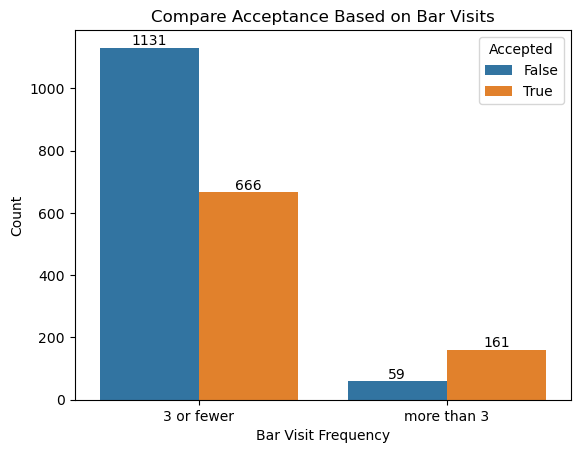

In [658]:
# Remove warning
pd.options.mode.chained_assignment = None

# fn to group Bar Visits
# df_bar['Bar'].value_counts()
def bar_visits(bar):
    if bar in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'
    
df_bar['bar_visits'] = df_bar['Bar'].apply(bar_visits)

# Create bar plot with Seaborn
fig = sns.countplot(df_bar, x='bar_visits', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Acceptance Based on Bar Visits')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count')

# Create contingency table comparing bar_visits to acceptance
ct = pd.crosstab(df_bar['bar_visits'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('================================================')
print(ct)
print('================================================')

In [660]:
count = [666, 161]
nobs = [1797, 220]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 8.530561518715193e-25


### Bar Visits Analysis

#### Question
What are the acceptance rates of those who went to a bar 3 or fewer times a month and those who went more? Compare them.

#### Answer

The acceptance rate of those that went to a bar three or less times per month is 37.06%.
The acceptance rate of those that went to a bar more than three times per month is 73.18%.

Performing a z-test on the data proves statistical significance. Clearly those that frequently go to the bar accepted the coupon more

### Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Accepted              False  True   Sum  Acceptance Rate
bar_visits & age                                        
Age > 25 & Visit > 1    128   292   420         0.695238
All Others             1062   535  1597         0.335003


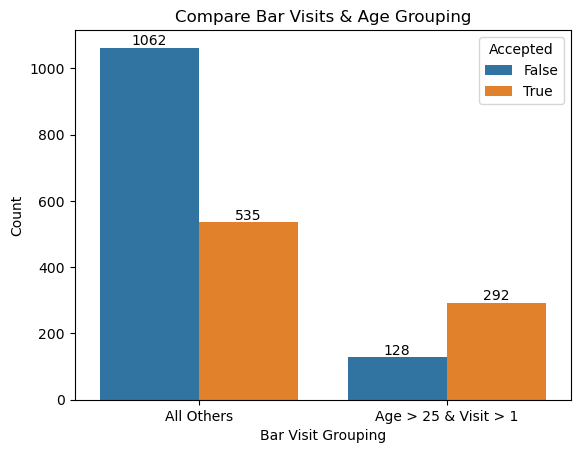

In [661]:
# df_bar['age'].value_counts()

# fn to group the data
def targetGroup(Bar, age):
    # go to a bar more than once a month and are over the age of 25     
    if Bar in ['1~3','4~8', 'gt8'] and age not in ['below21', '21']:
        return 'Age > 25 & Visit > 1'
    else:
        return 'All Others'

df_bar['bar_visits & age'] = df_bar[['Bar', 'age']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='bar_visits & age', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Bar Visits & Age Grouping')
plt.xlabel('Bar Visit Grouping')
plt.ylabel('Count')

# Create table comparing bar_visits to acceptance
ct = pd.crosstab(df_bar['bar_visits & age'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')


In [662]:
count = [535, 292]
nobs = [1597, 420]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 1.0868335024199753e-40


###  Analysis

#### Question
Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

#### Answer
Since the data groups those that go to a bar between 1 and 3 times a month into the same bucket, I am unable to seperate those that go more than once but less than three times from this grouping. Therefore, I will group the '1~3' into my analysis to capture the 2 and 3 timers.

The acceptance rate of those that went to a bar once or more and are over the age of 25 is 69.52%
The acceptance rate of all others is 33.50%.

The z-test above proves statistical significance.

Yes, there is a large difference between these groups. Those 25 and older who frequent the bar scene are fond of the coupon.

### Use the same process as above to compare the acceptance rate between drivers who go to bars more than once a month AND had passengers that were not a kid AND had occupations other than farming, fishing, or forestry. 


Accepted                       False  True   Sum  Acceptance Rate
bar_visits & pax & occupation                                    
All Others                      1021   427  1448         0.294890
Target Group                     169   400   569         0.702988


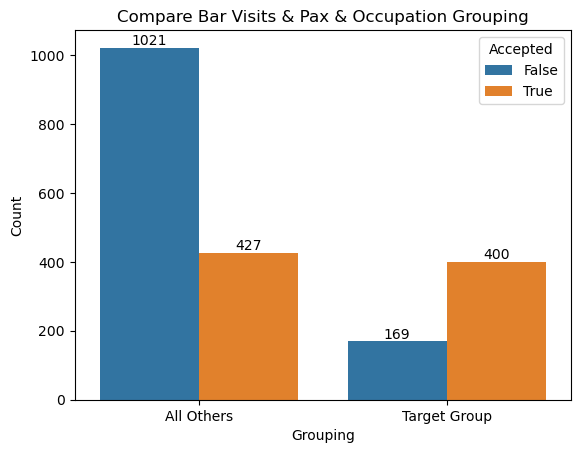

In [663]:
# df_bar['occupation'].value_counts()

def targetGroup(bar_visits, pax, occupation):
    
    if (# drivers who go to bars more than once a month
        bar_visits not in ['never', 'less1'] and 
        
        # had passengers that were not a kid
        pax not in ['Kid(s)'] and 
        
        # had occupations other than farming, fishing, or forestry
        occupation not in ['Farming Fishing & Forestry']):
        
        return 'Target Group'
    
    else: 
        return 'All Others'
    

df_bar['bar_visits & pax & occupation'] = df_bar[['Bar', 'passanger', 'occupation']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='bar_visits & pax & occupation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Bar Visits & Pax & Occupation Grouping')
plt.xlabel('Grouping')
plt.ylabel('Count')

ct = pd.crosstab(df_bar['bar_visits & pax & occupation'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')

In [664]:
count = [427, 400]
nobs = [1448, 569]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 4.048403767614319e-63


### Analysis

#### Question
Compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry.

#### Answer

The acceptance rate of the target group is 70.29%
The acceptance rate of All Others is 29.48%.

The z-test above proves statistical significance.

### Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Accepted      False  True   Sum  Acceptance Rate
targetGroup                                     
All Others     1002   671  1673         0.401076
Target Group    188   156   344         0.453488


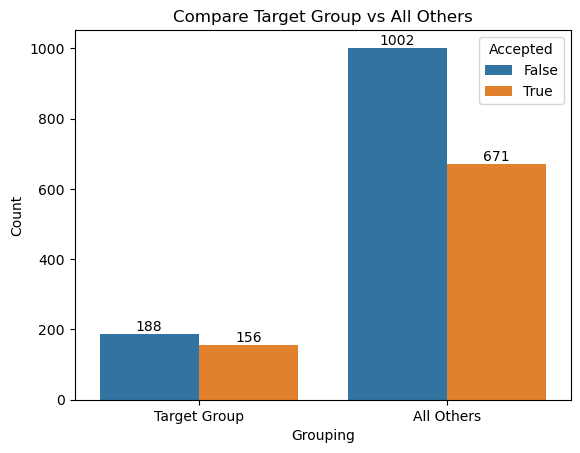

In [665]:
def targetGroup(Bar, passanger, maritalStatus, age, RestaurantLessThan20, income):
    if (
        # go to bars more than once a month
        bar_visits in ['1~3','4~8', 'gt8'] and 
        
        # had passengers that were not a kid
        passanger not in ['Kid(s)'] and 
        
        # were not widowed
        maritalStatus not in ['widowed']
    ) or (
        # go to bars more than once a month
        bar_visits in ['1~3','4~8', 'gt8'] and 
        
        # are under the age of 30
        age in ['below21', '21', '26']
    ) or (
        #go to cheap restaurants more than 4 times a month
        RestaurantLessThan20 in ['4~8', 'gt8'] and 
        
        # income is less than 50K
        income in ['Less than $12500', '$37500 - $49999', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
    ):
        return 'Target Group'
    else:
        return 'All Others'

df_bar['targetGroup'] = df_bar[['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='targetGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Target Group vs All Others')
plt.xlabel('Grouping')
plt.ylabel('Count')

ct = pd.crosstab(df_bar['targetGroup'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')

In [666]:
count = [671, 156]
nobs = [1673, 344]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.07185020103763802


### Analysis

#### Question
Compare the acceptance rate between drivers who :

- go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
- go to bars more than once a month and are under the age of 30 OR
- go to cheap restaurants more than 4 times a month and income is less than 50K.

#### Answer

The acceptance rate of the bar coupon for the target group is 45.34%
The acceptance rate of the bar coupon for All Others is 40.10%.

TODO: Go into more detail here

The z-test above proves that his is NOT statistically significance.

### Conclusion reviewing Bar Coupons
Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The below are target groups that proved to accept the bar coupon more at a higher rate than all others. 

- passengers that visit bars more than 3 times a month - **73.18% Acceptance Rate**
- passengers that are 25+ and visit bars at least once a month - **69.52% Acceptance Rate**
- passengers that visit bars at least once a month, do not have kids and are not in an AGG type of job - **70.29% Acceptance Rate**

Targeting these groups more should yield a higher overall acceptance rate for the Bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Overview of All Coupon Acceptance Rates

Y                             0         1       sum  Acceptance Rate
coupon                                                              
Bar                    0.093819  0.065200  0.159019         0.410015
Restaurant(20-50)      0.065752  0.051876  0.117629         0.441019
Coffee House           0.157758  0.157285  0.315043         0.499249
Restaurant(<20)        0.064333  0.155314  0.219647         0.707107
Carry out & Take away  0.049905  0.138757  0.188663         0.735478


Text(0, 0.5, 'Count')

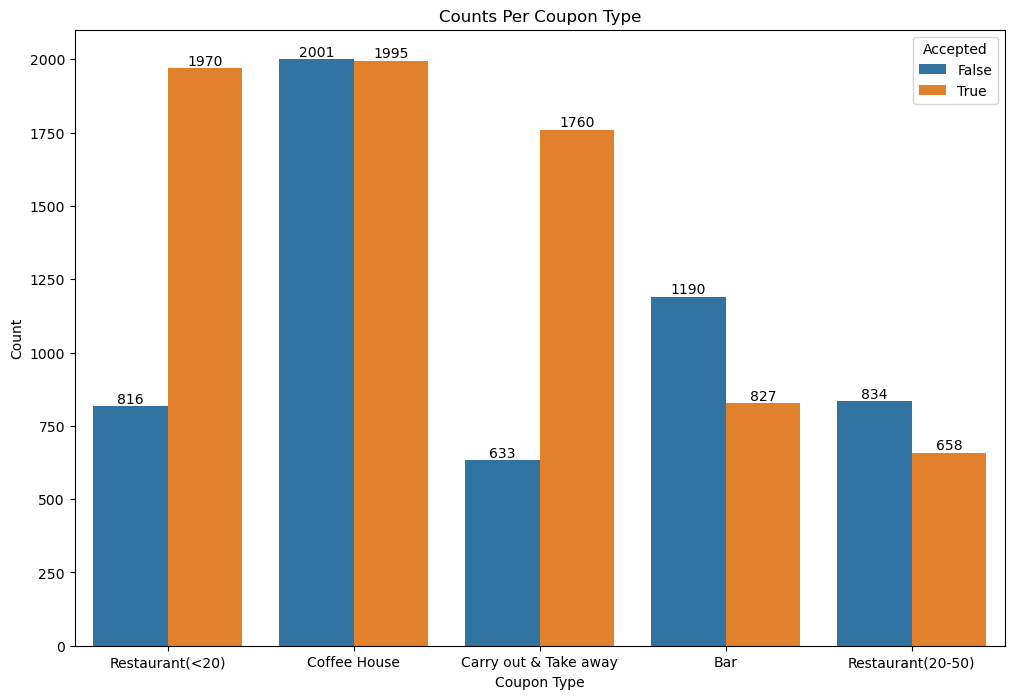

In [667]:
ct = pd.crosstab(data_cleaned['coupon'], data['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print('====================================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('====================================================================')

plt.figure(figsize=(12,8))
fig = sns.countplot(data_cleaned, x='coupon', hue='Accepted')
fig.bar_label(container=fig.containers[0])
fig.bar_label(container=fig.containers[1])

plt.title('Counts Per Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

From the data above, the coupon with the largest acceptance rate was the "Carry out & Take away" coupon with ~73% acceptance rate. The Bar coupon was the lowest with 41% acceptance rate. Lets look into the other Restaurant(20-50), the second lowest performing coupon, with a ~44% acceptance rate to see if we can identify the target audience.

## Problem: Identify target and exclusion groups for the Restaurant (20-50) coupon in order to help the business target the correct audience. 

Lets also understand who does not want this particular coupon

### Reviewing Restaurant(20-50) Coupon (44% Acceptance Rate)


In [668]:
df_res_20_50 = data_cleaned.query('coupon == "Restaurant(20-50)"')
df_res_20_50.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
9052,No Urgent Place,Kid(s),Sunny,80,10PM,Restaurant(20-50),1d,Male,31,Married partner,...,less1,gt8,4~8,less1,1,1,0,0,1,False
1405,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,50plus,Widowed,...,less1,1~3,4~8,less1,1,1,0,0,1,False
3286,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,31,Married partner,...,less1,1~3,gt8,less1,1,1,0,0,1,True
3178,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,50plus,Married partner,...,never,1~3,1~3,less1,1,1,0,0,1,False
7640,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,50plus,Unmarried partner,...,1~3,4~8,4~8,1~3,1,1,1,0,1,True


<Axes: xlabel='age', ylabel='count'>

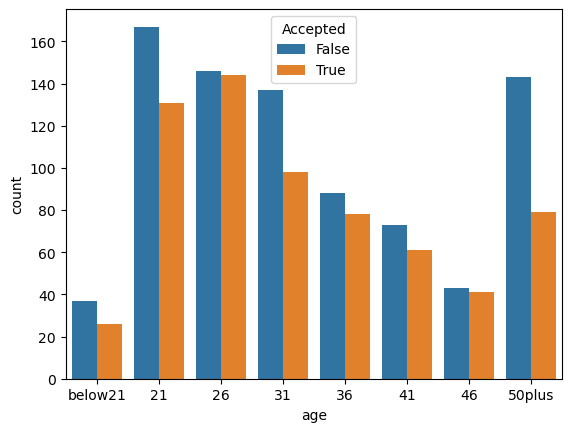

In [669]:
sns.countplot(df_res_20_50, x='age', hue='Accepted', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])

<Axes: xlabel='count', ylabel='income'>

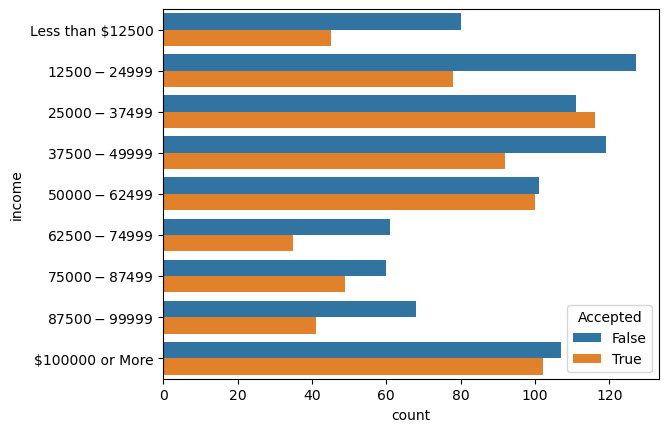

In [670]:
sns.countplot(df_res_20_50, y='income', hue='Accepted', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])

<Axes: xlabel='maritalStatus', ylabel='count'>

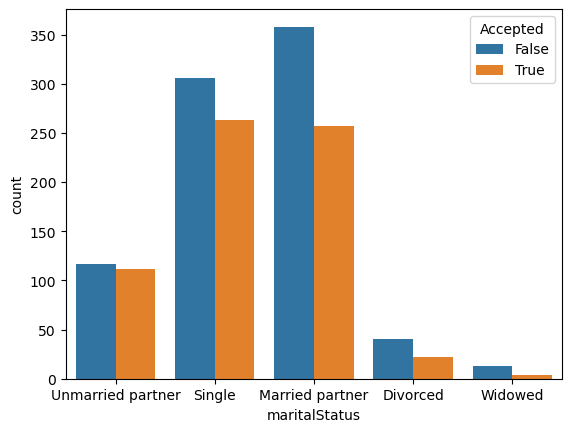

In [671]:
sns.countplot(df_res_20_50, x='maritalStatus', hue='Accepted')

<Axes: xlabel='count', ylabel='occupation'>

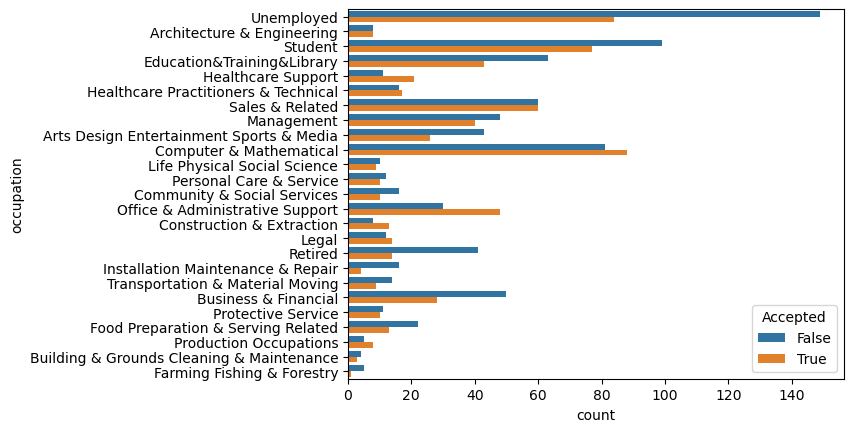

In [672]:
sns.countplot(df_res_20_50, y='occupation', hue='Accepted')

<Axes: xlabel='has_children', ylabel='count'>

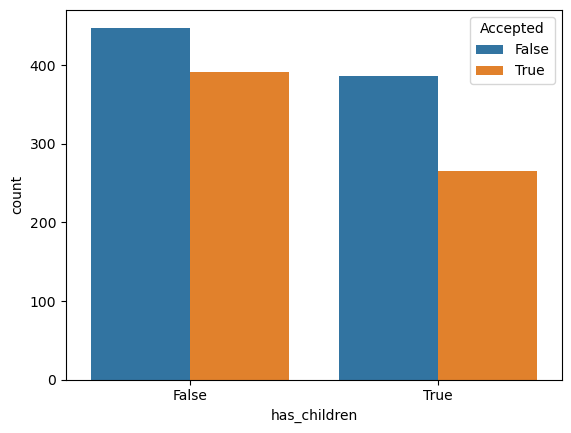

In [673]:
sns.countplot(df_res_20_50, x='has_children', hue='Accepted')

<Axes: xlabel='Restaurant20To50', ylabel='count'>

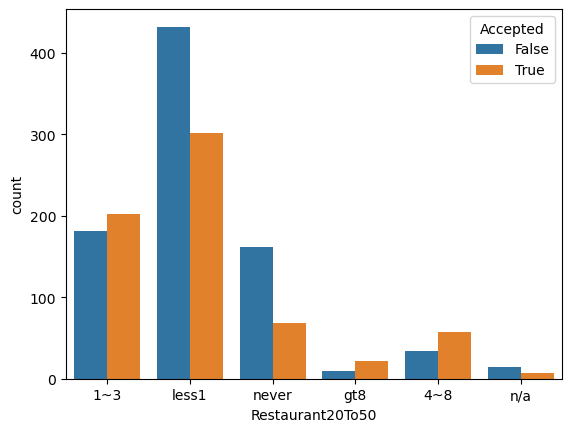

In [674]:
sns.countplot(df_res_20_50, x='Restaurant20To50', hue='Accepted')

### Explore Target Groups

With most of the data being catagorical, I will be using a pandas crosstab table to compare these catagorical varaiables to acceptance of the coupon. I will also utilize the scipy library to perform a chi-square test on the data to help identify the variables that are good predictiors of accepting the coupon.

In [687]:
catagories_to_review = []
catagories_to_exclude = []
for column in df_res_20_50.columns:
    ct = pd.crosstab(df_res_20_50['Accepted'], df_res_20_50[column])
    chi2, p, _, _ = chi2_contingency(ct)
    
    if p < 0.05:
        print(f"Chi-squared Value for {column} = {chi2}")
        print(f"P-Value for {column} = {p}")
        print(ct)
        catagories_to_review.append(column)
    else:
        print(f"Chi-squared Value for {column} = {chi2}")
        print(f"P-Value for {column} = {p}")
        catagories_to_exclude.append(column)
        
    print('\n')
    
print(f"These are the columns to review {catagories_to_review}")
print(f"These are the columns to exclude {catagories_to_exclude}")
        


Chi-squared Value for destination = 9.708280898709413
P-Value for destination = 0.007796031558132449
destination  Home  No Urgent Place  Work
Accepted                                
False         372              204   258
True          281              206   171


Chi-squared Value for passanger = 25.718418641172853
P-Value for passanger = 1.0923830699307891e-05
passanger  Alone  Friend(s)  Kid(s)  Partner
Accepted                                    
False        583         90     109       52
True         426         78      65       89


Chi-squared Value for weather = 18.104110563875132
P-Value for weather = 0.00011715001301219146
weather   Rainy  Snowy  Sunny
Accepted                     
False        40    126    668
True         25     54    579


Chi-squared Value for temperature = 18.156912784600394
P-Value for temperature = 0.00011409759351900688
temperature   30   55   80
Accepted                  
False        181  212  441
True          92  156  410


Chi-squared Value f

From the analysis above, lets review the below columns

['destination', 'passanger', 'weather', 'temperature', 'time', 'expiration', 'has_children', 'occupation', 'income', 'Restaurant20To50']

### Review Restaurant Visits

Accepted          False  True  Sum  Acceptance Rate
Restaurant20To50                                   
never               162    68  230         0.295652
n/a                  15     7   22         0.318182
less1               432   302  734         0.411444
1~3                 181   202  383         0.527415
4~8                  34    57   91         0.626374
gt8                  10    22   32         0.687500


Text(0, 0.5, 'Count')

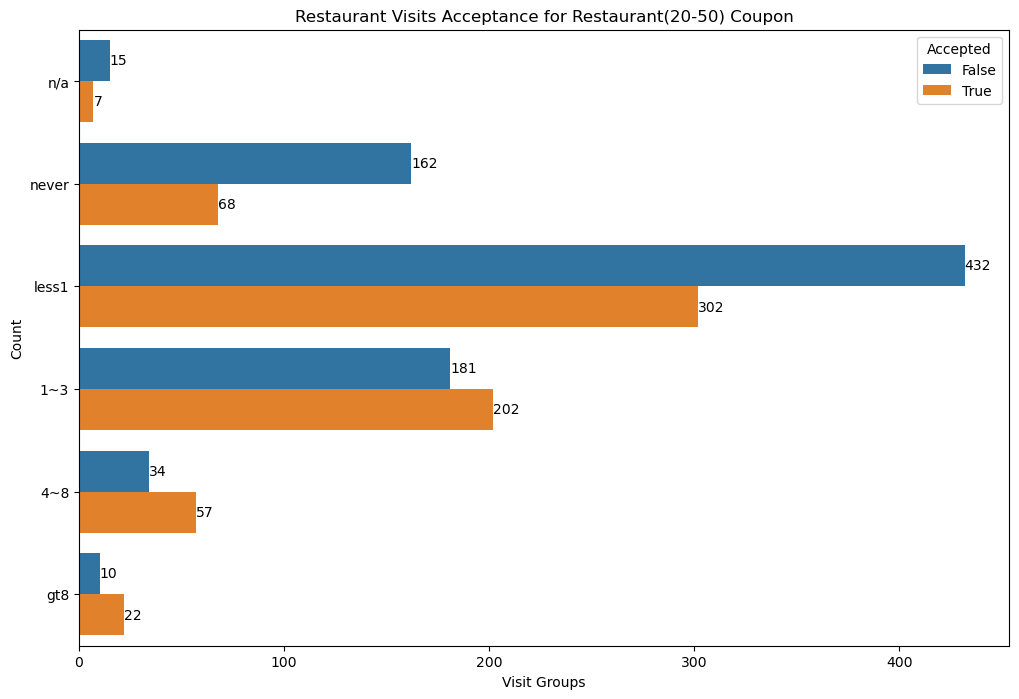

In [689]:
df_res_20_50['Restaurant20To50'].value_counts()

ct = pd.crosstab(df_res_20_50['Restaurant20To50'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))


plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='Restaurant20To50', hue='Accepted', order=['n/a', 'never', 'less1', '1~3', '4~8', 'gt8'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

Those that visit the restaurant more than once a month have the highest acceptance rate.

### Review Destintaion 

Accepted         False  True  Sum  Acceptance Rate
destination                                       
Work               258   171  429         0.398601
Home               372   281  653         0.430322
No Urgent Place    204   206  410         0.502439


Text(0, 0.5, 'Count')

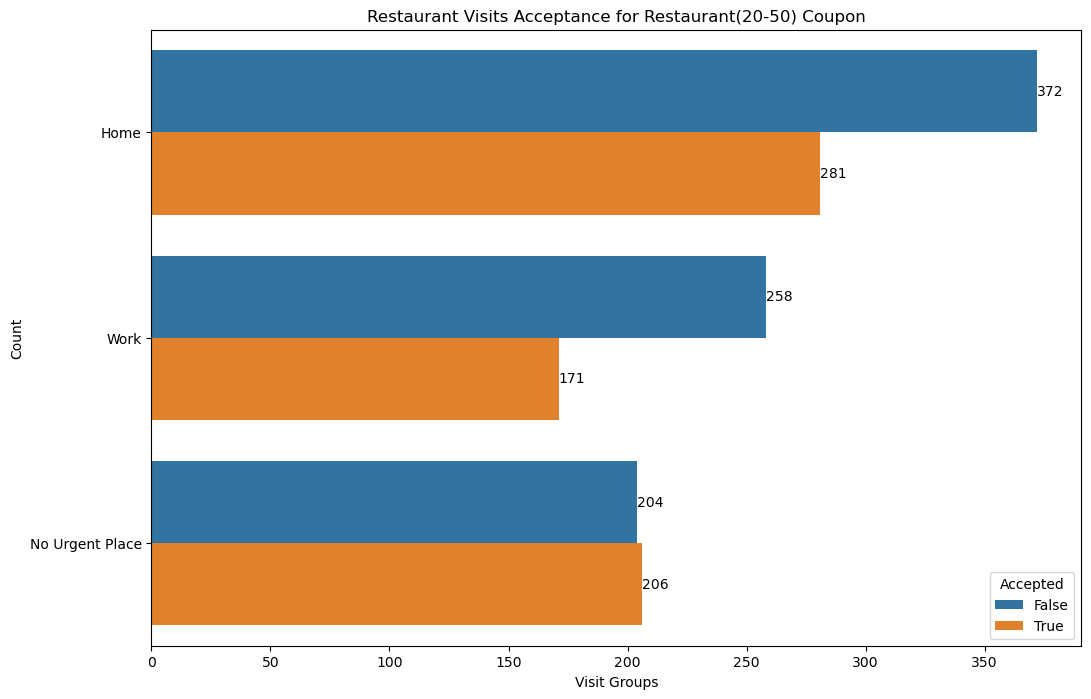

In [678]:
df_res_20_50['destination'].value_counts()

ct = pd.crosstab(df_res_20_50['destination'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))


plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='destination', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

Those having no specific destination were more likely to accept the coupon than all the others.

### Review Passenger

Accepted   False  True   Sum  Acceptance Rate
passanger                                    
Kid(s)       109    65   174         0.373563
Alone        583   426  1009         0.422200
Friend(s)     90    78   168         0.464286
Partner       52    89   141         0.631206


Text(0, 0.5, 'Count')

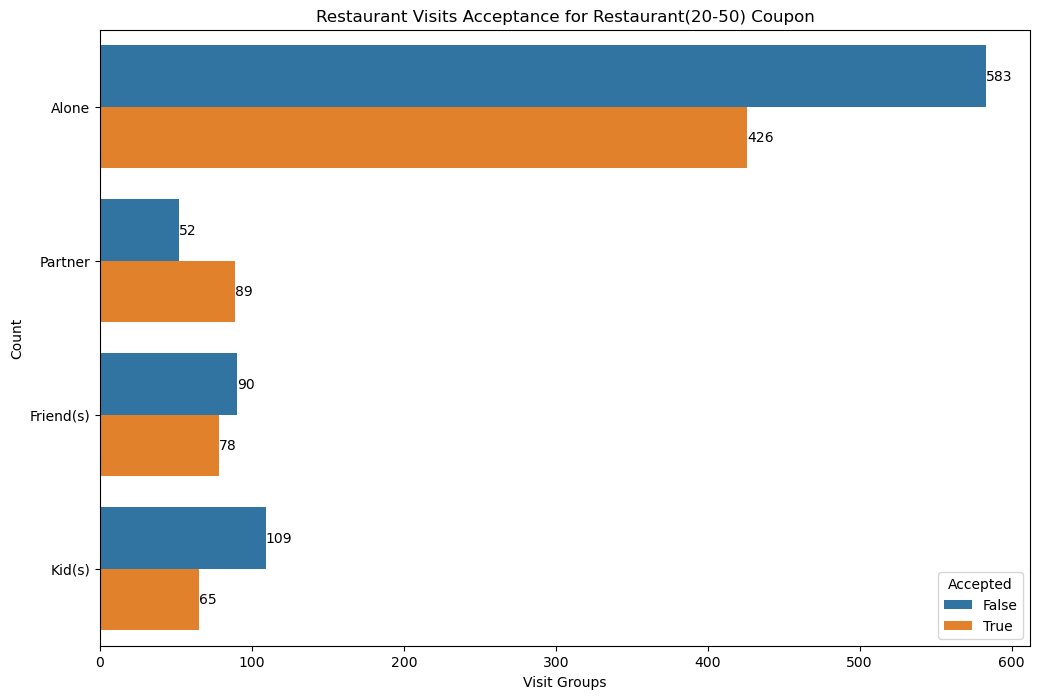

In [682]:
df_res_20_50['passanger'].value_counts()

ct = pd.crosstab(df_res_20_50['passanger'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='passanger', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

Those that had a partner were more likely to accept the coupon

### Review Weather

Accepted  False  True   Sum  Acceptance Rate
weather                                     
Snowy       126    54   180         0.300000
Rainy        40    25    65         0.384615
Sunny       668   579  1247         0.464314


Text(0, 0.5, 'Count')

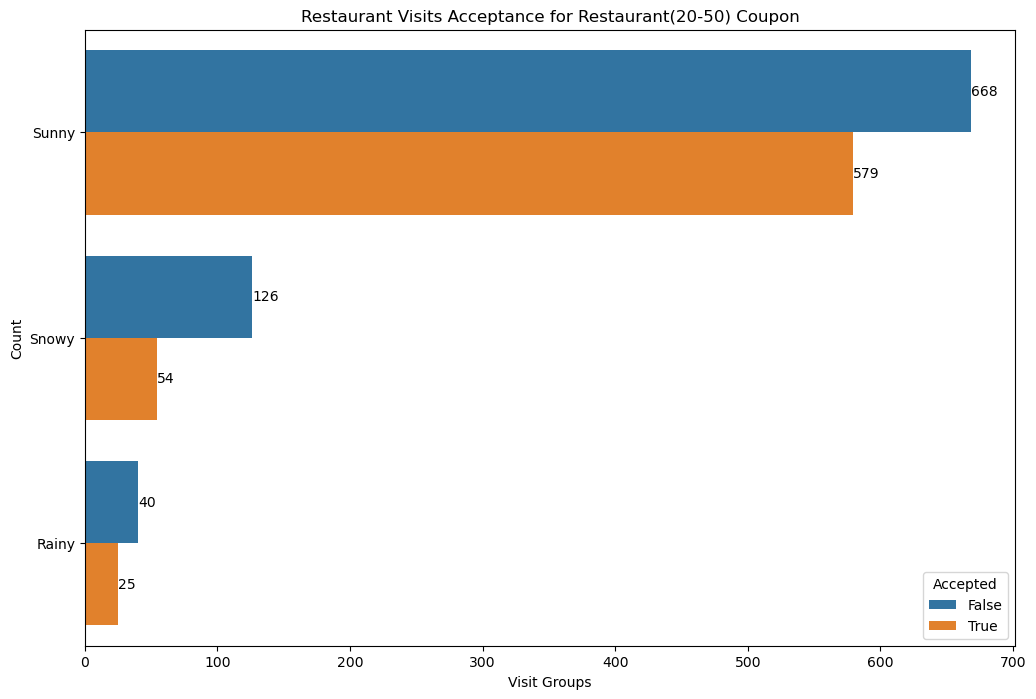

In [683]:
df_res_20_50['weather'].value_counts()

ct = pd.crosstab(df_res_20_50['weather'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='weather', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

Sunny days carries the most accepted coupons.

What were those doing on rainy days to accept the coupon?

### Review Temperature

Accepted     False  True  Sum  Acceptance Rate
temperature                                   
30             181    92  273         0.336996
55             212   156  368         0.423913
80             441   410  851         0.481786


Text(0, 0.5, 'Count')

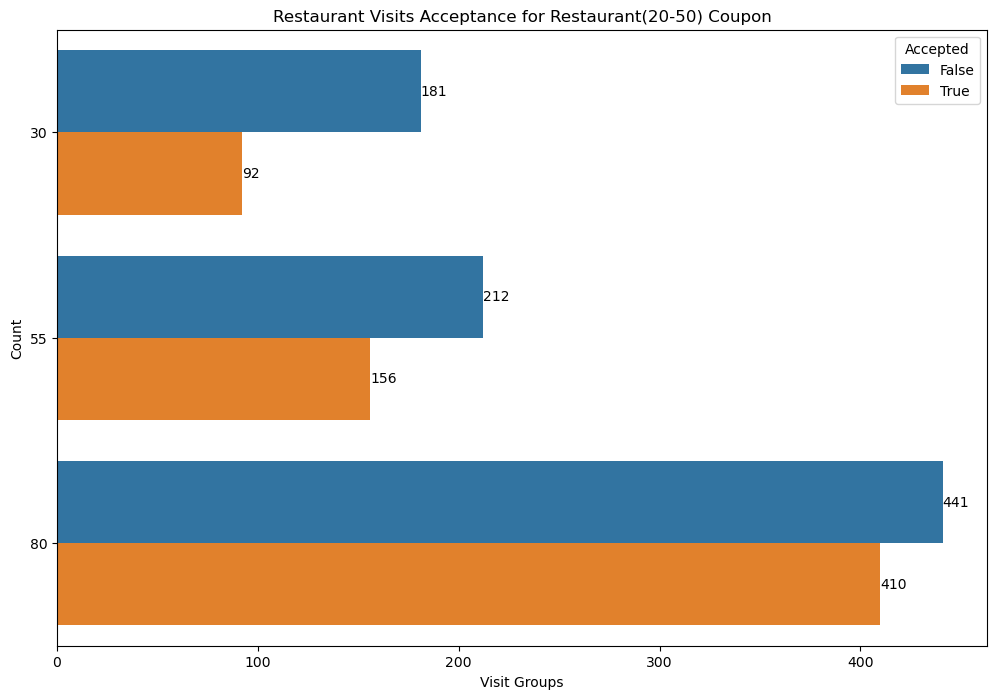

In [684]:
df_res_20_50['temperature'].value_counts()

ct = pd.crosstab(df_res_20_50['temperature'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='temperature', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

80 deg seems like the best temp for accepting the coupon

What would it take for those in 30 deg to accept?

### Reviewing Time

Accepted  False  True  Sum  Acceptance Rate
time                                       
10PM        256   125  381         0.328084
7AM         258   171  429         0.398601
6PM         193   195  388         0.502577
2PM          84    98  182         0.538462
10AM         43    69  112         0.616071


Text(0, 0.5, 'Count')

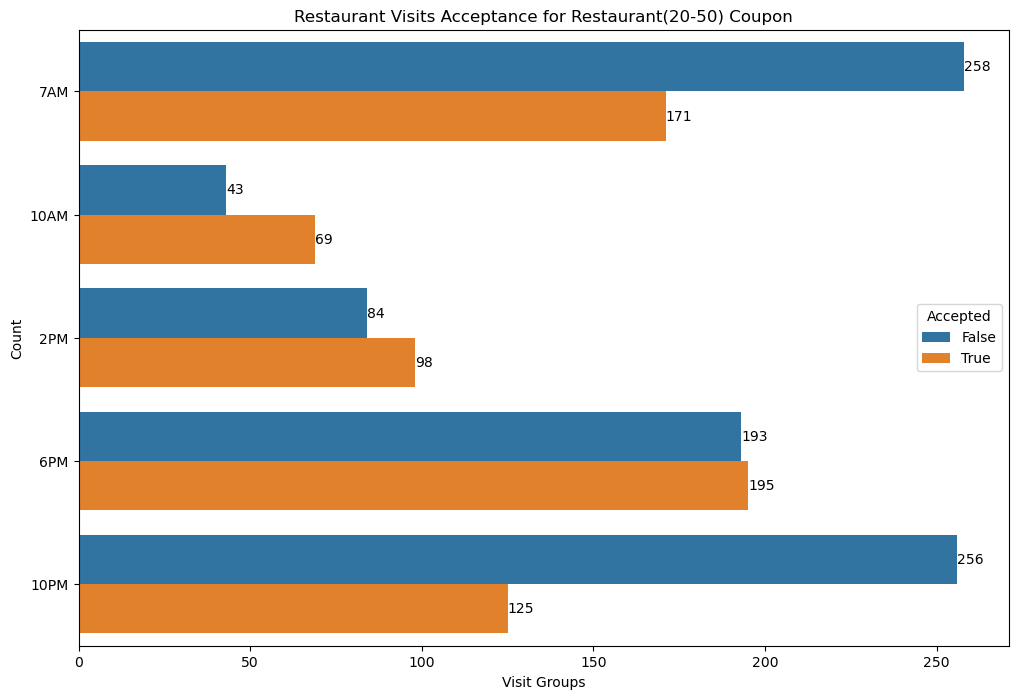

In [686]:
df_res_20_50['time'].value_counts()

ct = pd.crosstab(df_res_20_50['time'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='time', hue='Accepted', order=['7AM', '10AM', '2PM', '6PM', '10PM'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

### Reviewing Expiration

Accepted    False  True  Sum  Acceptance Rate
expiration                                   
2h            376   160  536         0.298507
1d            458   498  956         0.520921


Text(0, 0.5, 'Count')

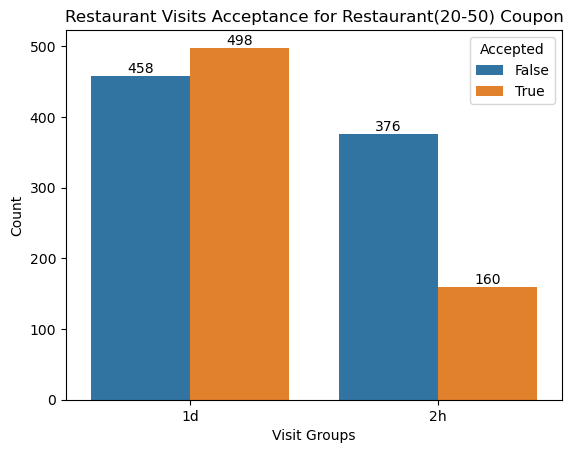

In [705]:
df_res_20_50['expiration'].value_counts()

ct = pd.crosstab(df_res_20_50['expiration'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))


fig = sns.countplot(df_res_20_50, x='expiration', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

### Reviewing Has Children

Accepted      False  True  Sum  Acceptance Rate
has_children                                   
True            386   266  652         0.407975
False           448   392  840         0.466667


Text(0, 0.5, 'Count')

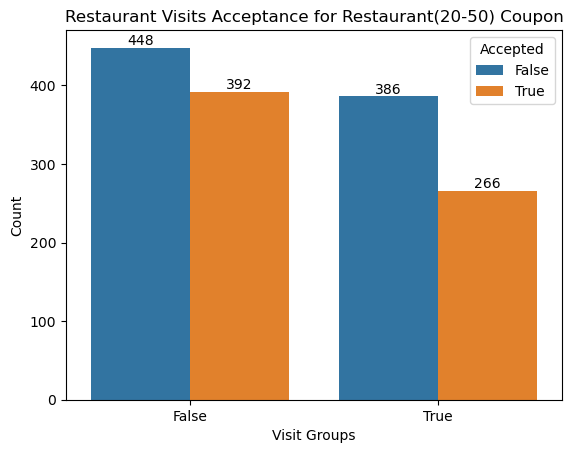

In [707]:
df_res_20_50['has_children'].value_counts()

ct = pd.crosstab(df_res_20_50['has_children'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='has_children', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

### Reviewing Occupation

Accepted                                   False  True  Sum  Acceptance Rate
occupation                                                                  
Farming Fishing & Forestry                     5     1    6         0.166667
Installation Maintenance & Repair             16     4   20         0.200000
Retired                                       41    14   55         0.254545
Business & Financial                          50    28   78         0.358974
Unemployed                                   149    84  233         0.360515
Food Preparation & Serving Related            22    13   35         0.371429
Arts Design Entertainment Sports & Media      43    26   69         0.376812
Community & Social Services                   16    10   26         0.384615
Transportation & Material Moving              14     9   23         0.391304
Education&Training&Library                    63    43  106         0.405660
Building & Grounds Cleaning & Maintenance      4     3    7         0.428571

Text(0, 0.5, 'Count')

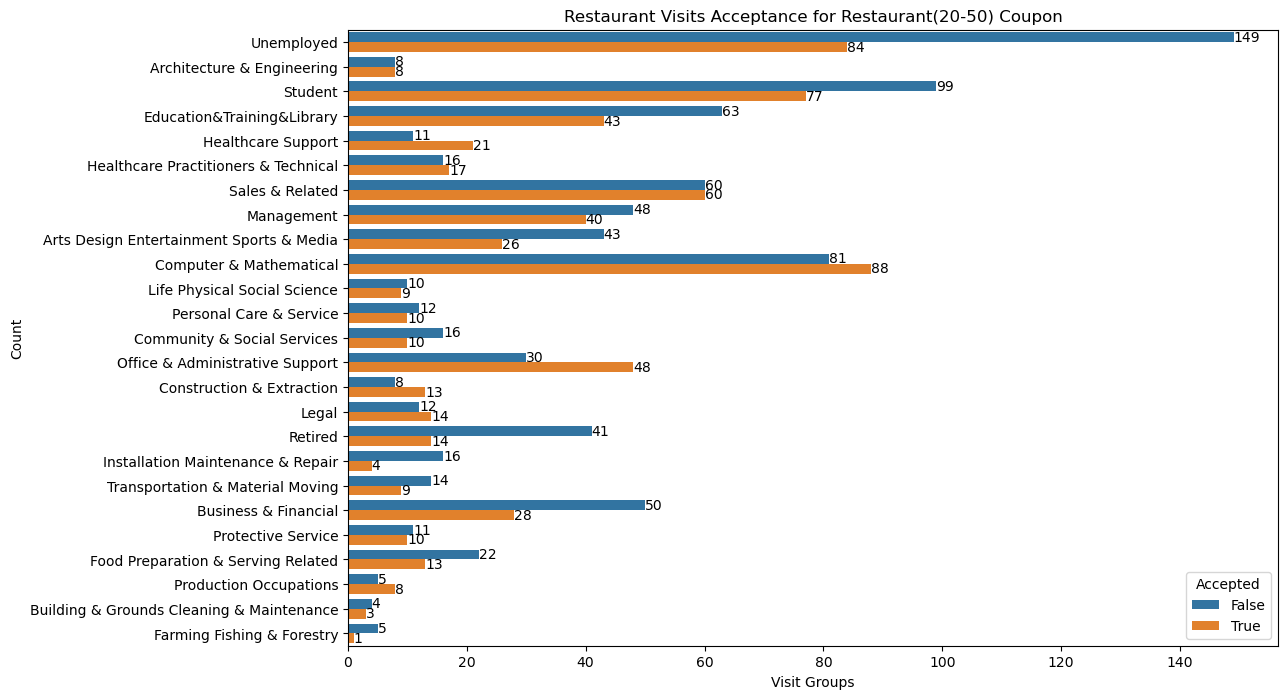

In [709]:
df_res_20_50['occupation'].value_counts()

ct = pd.crosstab(df_res_20_50['occupation'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, y='occupation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')

### Reviewing Income

Accepted          False  True  Sum  Acceptance Rate
income                                             
Less than $12500     80    45  125         0.360000
$62500 - $74999      61    35   96         0.364583
$87500 - $99999      68    41  109         0.376147
$12500 - $24999     127    78  205         0.380488
$37500 - $49999     119    92  211         0.436019
$75000 - $87499      60    49  109         0.449541
$100000 or More     107   102  209         0.488038
$50000 - $62499     101   100  201         0.497512
$25000 - $37499     111   116  227         0.511013


Text(0, 0.5, 'Count')

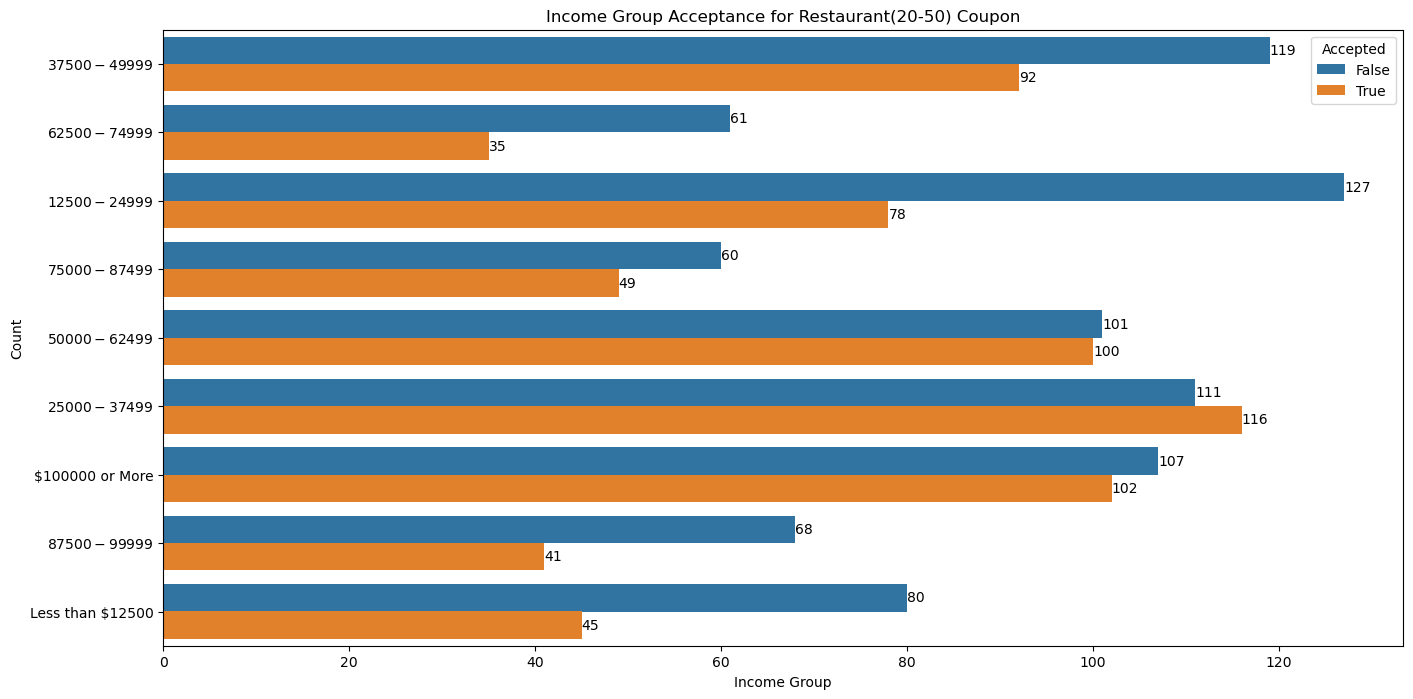

In [701]:
# df_res_20_50.info()
df_res_20_50['income'].value_counts()

ct = pd.crosstab(df_res_20_50['income'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print('==========================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('==========================================================')

plt.figure(figsize=(16,8))
fig = sns.countplot(df_res_20_50, y='income', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Income Group Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Income Group')
plt.ylabel('Count')

### Identifying a Target Groups and Exclusion Groups

Accepted        False  True   Sum  Acceptance Rate
TargetGroup                                       
All Others        680   472  1152         0.409722
Target Group 2     96    99   195         0.507692
Target Group 1     58    87   145         0.600000


Text(0, 0.5, 'Count')

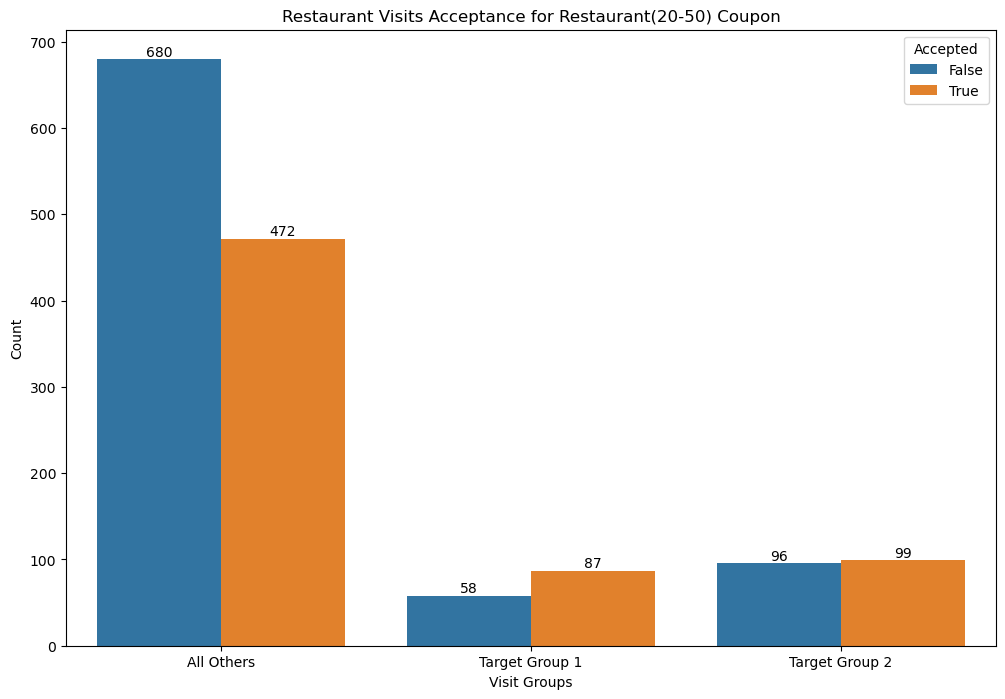

In [699]:
def targetGroup(Restaurant20To50, weather, income, time, destination, temperature):
    
    if (destination in ['No Urgent Place'] and Restaurant20To50 in ['1~3','4~8', 'gt8'] ):
        return 'Target Group 1'
    
    if (weather in ['Sunny'] and time in ['10AM', '2PM', '6PM']):
        return 'Target Group 2'
    
#     if (temperature in ['80'] and time in ['10AM', '2PM', '6PM']):
#         return 'Target Group 3'
    
#     if (age in ['50plus']):
#         return 'Exclusion Group 1'
    
    return 'All Others'

df_res_20_50['TargetGroup'] = df_res_20_50[['Restaurant20To50', 'weather', 'income', 'time', 'destination', 'temperature']].apply(lambda x: targetGroup(*x), axis=1)

ct = pd.crosstab(df_res_20_50['TargetGroup'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))


plt.figure(figsize=(12,8))
fig = sns.countplot(df_res_20_50, x='TargetGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Restaurant Visits Acceptance for Restaurant(20-50) Coupon')
plt.xlabel('Visit Groups')
plt.ylabel('Count')